# Overview of the existing stochastic gradient descent algorithms

## Numerical derivatives approximation

Aside from the general definition of the optimization problem, we consider it as a smooth problem of stochastic programming (1) [1], which we express in the following equation:

$$
\begin{matrix}
\min_{x \in X} f(x) = \mathbb{E}F(x, \xi) = \int_{\xi \in \Xi} F(x, \xi) P(d \xi), X \subseteq \mathbb{R}^{n} & (1)
\end{matrix}
$$

We define the target function $ F(x) $ as a continuous and smooth (differentiable) function, $ x \in \mathbb{R} $ - a dependent variable defined on a space $ \inf_{x \in X} F(x) > - \infty $, $ \xi $ - a random variable modeled by a previously unknown probability distribution $ P(d \xi) $ on the event space $ \Xi $. By definition, the investigated function $ f $ is a non-analytical and non-smooth function representing an averaged value of a particular stochastic oracle $ \tilde{F}(x, \xi_{i}) $, which also has an approximated value of the gradient $ \nabla \tilde{F}(x, \xi_{i}) $. A well-known method for estimating the function $ f $ is modeling by the Monte Carlo method or any other stochastic method with a predetermined number of experiments, where $ \xi $ is a random variable in the mathematical functional model $ \tilde{F}(x, \xi_{i}) $ and the formula for the gradient $ \nabla \tilde{F}(x, \xi_{i}) $.

The method of gradient descent in the problem of stochastic optimization can also be considered an iterative process:

$$
\begin{matrix}
x_{i+1} = \Pi_{X}(x_{i} - \lambda_{i} H_{i}^{-1} g(x_{i}, M(x_{i}))) & (2)
\end{matrix}
$$

Here the parameter $ \lambda_{i} $ is a step of the gradient descent method, $ H_{i} $ - the Hesse matrix approximation for the optimization function at each step of the method $ i $, and $ g(x_{i}, M(x_{i})) $ is an approximation of the gradient $ \nabla \tilde{F}(x, \xi_{i}) $ for a specific sample from the set of measurements $ M(x_{i}) $. Here the projection operator $ \Pi_{X}(y) $ is given by the formula:

$$
\begin{matrix}
\Pi_{X}(y) = \arg \inf_{x \in X} \{ || y - x || \} & (3)
\end{matrix}
$$

Before a detailed analysis of stochastic gradient algorithms, we define the gradient of the function and the gradient descent. The gradient of the function $ F $ in space $ \mathbb{R}^{n} $ is a column vector of partial derivatives with respect to each variable $ x_1, ..., x_n $ for a certain point $ a \in \mathbb{R}^{n} $:

$$
\begin{matrix}
\nabla F(a) = \begin{bmatrix} \frac{\partial F(a)}{\partial x_{1}}, \cdots, \frac{\partial F(a)}{\partial x_{n}} \end{bmatrix} & (4)
\end{matrix}
$$

The main feature of the gradient is the indication of the direction of the largest increment of the function $ F $ at a given point. The main iteration scheme for gradient descent methods is based on it: by assumption, the point of a minimum of the target function is in the direction opposite to the gradient, i.e. the anti-gradient or $ - \nabla F $. The iteration scheme of gradient descent methods consists of successive updating of independent parameters of the model $ \theta_{i} $ by the value of the anti-gradient with a certain constant step $ \lambda \in [0, 1] $: $ \theta_{i+1} = \theta_{i} - \lambda \cdot \nabla F $.

The work of the algorithm continues until one of the set limit conditions is reached:
 - a finite number of iterations;
 - by the theorem on the necessary condition for the existence of a minimum: $ || \nabla F(x_{k}) || \to 0 $ or in the case of stochastic approximation $ \mathbb{E} || \nabla F(x_{k}) || \to 0 $.

In this paper, the value of the gradient is calculated by the finite difference method: the value of the derivative is a result of a decomposing transformation of the function into a Taylor series:

$$
\begin{matrix}
f(x + h) = \sum_{i=1}^{\infty} \frac{f^{(i)}(x)}{i!} h^i & (5)
\end{matrix}
$$

Before defining the concept of Taylor series approximation and Taylor's Theorem, let us show the basic properties of a function that is $N$-times differentiable.

***General Rolle’s theorem [2].*** Given the analytical function $ F: (a, b) \to \mathbb{R} $ defined on the segment $ (a, b) $ where $ a, b \in \mathbb{R}, a < b $. For any natural number $ n \in \mathbb{N} $ function is $ N $-times differentiable on the open segment $ (a, b) $ and derivatives $ F, F', ..., F^{(n-1)} $ of the function are continuous on the closed interval $ [a, b] $. Then, if the condition is satisfied $ F(a) = F'(a) = ... = F^{(n-1)}(a) = F(b) = 0 $, on the defined segment exists an element $ c \in (a, b) $ that will satisfy the following condition $ F^{n}(c) = 0 $. Let us use the properties from the general theorem of Rolle’s to construct an $ N $-degree polynomial for the function $ F $, satisfying the conditions described above, and formulating the following theorem.

***Taylor’s theorem [3].*** Given the analytical function $ F: (a, b) \to \mathbb{R} $ defined on the segment $ (a, b) $ where $ a, b \in \mathbb{R}, a < b $. For any natural number $ n \in \mathbb{N} $ function is $ N $-times differentiable on the open segment $ (a, b) $ and derivatives $ F, F', ..., F^{(n - 1)} $ of the function are continuous on the closed interval $ [a, b] $. Then exists an element $ c \in (a, b) $, that guarantees the existence of a single Taylor’s series decomposition:

$$
\begin{matrix}
f(b) = \sum_{k=0}^{n-1}\frac{f^{(k)}(a)}{k!} (b - a)^{k} + \frac{f^{(n)}(c)}{n!}(b - a)^{n} & (6)
\end{matrix}
$$

This theorem can be interpreted otherwise: any analytical $ N $-times differentiable function $ F $ can be “reconstructed” at any point of a $ \mathbb{R} $ space, if we know the value of the function and value of any order derivatives for a single element $ x_{0} \in \mathbb{R} $. The equation of Taylor’s series polynomial can be simplified by discarding unnecessary residual terms that have higher accuracy order than the first order. By substituting the difference between of anchor element $ x_{0} \in \mathbb{R} $ and other elements from $ \mathbb{R} $ space with $ h = x - x_{0} $:

$$
\begin{matrix}
f(x_{0} + h) = f(x_{0}) + f'(x_{0})h + o(h) & (7)
\end{matrix}
$$

By replacing the terms of the equation we get the numerical formula of the first-order derivative of the function $ f $:

$$
\begin{matrix}
f_{x_{0} + 0}'(x_{0}) = \frac{f(x_{0} + h) - f(x_{0})}{h} + o(h) & (8)
\end{matrix}
$$

Considering equations (6) and (7) we can get numerical derivative for a negative direction $ f_{x_{0} - 0}'(x_{0}) $ by constructing Taylor’s series with the negative value of the step difference $ h < 0 $:

$$
\begin{matrix}
f(x_{0} - h) = f(x_{0}) + f'(x_{0})(-h) + o(h) \implies f_{x_{0} - 0}'(x_{0}) = \frac{f(x_{0}) - f(x_{0} - h)}{h} + o(h) & (9)
\end{matrix}
$$

By discarding residual terms after the first term, we get the finite-difference approximation of for the derivative value of $ f $ with the precision order $ O(h) $:

$$
\begin{matrix}
\begin{cases}
f'(x) = \frac{f(x + h) - f(x)}{h} - \frac{h f''(\xi)}{2} \\
f'(x) = \frac{f(x) - f(x - h)}{h} + \frac{h f''(\xi)}{2}
\end{cases} & (10)
\end{matrix}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm
from typing import Callable, Tuple


def grad_left(F: Callable[[np.array], np.array], x: np.array, h=0.001) -> np.array:
    n, grad = len(x), np.zeros(x.shape)
    
    for i in range(n):
        vh = h * np.eye(1, n, i).reshape((n, ))
        grad[i] = (F(x) - F(x - vh)) / h

    return grad


def grad_right(F: Callable[[np.array], np.array], x: np.array, h=0.001) -> np.array:
    n, grad = len(x), np.zeros(x.shape)

    for i in range(n):
        vh = h * np.eye(1, n, i).reshape((n, ))
        grad[i] = (F(x + vh) - F(x)) / h

    return grad

Let us experimentally evaluate the accuracy of gradient implementations on the set of test functions:

 - $ f(x) = x^3 + 2x^2 + 12x + 100 \implies f'(x) = 3x^2 + 4x + 12, f'(2.0) = 32.0 $
 - $ F(x, y) = x^2 + xy + y^2 \implies \begin{cases} \frac{\partial F(x, y)}{\partial x} = 2x + y, \frac{\partial F(2.0, -1.0)}{\partial x} = 3.0 \\ \frac{\partial F(x, y)}{\partial y} = x + 2y, \frac{\partial F(2.0, -1.0)}{\partial y} = 0.0
 \end{cases} $

In [2]:
h = 1e-6
x_onedim = np.array([2.0])
x_muldim = np.array([2.0, -1.0])

f = lambda x: x ** 3 + 2 * x ** 2 + 12 * x + 100
F = lambda x: x[0] ** 2 + x[0] * x[1] + x[1] ** 2

np.testing.assert_almost_equal(grad_left(f, x_onedim, h=h), 32.0, decimal=5)
np.testing.assert_almost_equal(grad_right(f, x_onedim, h=h), 32.0, decimal=5)

np.testing.assert_almost_equal(grad_left(F, x_muldim, h=h), np.array([3.0, 0.0]), decimal=5)
np.testing.assert_almost_equal(grad_right(F, x_muldim, h=h), np.array([3.0, 0.0]), decimal=5)

The accuracy of the approximation depends on the number of nodes on the numerical partitioning grid, thus the smaller step difference, the higher precision. Using the Runge-Romberg-Richardson algorithm [4] we can achieve an increase in the order of the precision of the partitioning grid up to $ O(h^2) $ without adding extra iterations to the approximation algorithm. The approach is based on empirical estimation of the target function value $ z $ while decreasing the step size $ h $. The estimation is based on the assumption:

$$
\begin{matrix}
z \approx \zeta(h) + O(h^p) & (11)
\end{matrix}
$$

Let us define a new partitioning grid with the step value of $ r \cdot h $ and then calculate the value of a target function $ z $ on the grid:

$$
\begin{matrix}
z \approx \zeta(r \cdot h) + r^p \cdot O(h^p) & (12)
\end{matrix}
$$

By combining two partition grids from (11) and (12), we rearrange terms and discard the main term of the precision order $ O(h^p) $ and get an estimation of the target function value $ z $ with the higher precision order:

$$
\begin{matrix}
z \approx \frac{r^p \zeta(h) - \zeta(r \cdot h)}{r^p - 1} + O(h^{p+1}) & (13)
\end{matrix}
$$

Now if we can derive an estimation for the definition in (11) by extracting from it the equation (13):

$$
\begin{matrix}
O(h^p) \approx \frac{\zeta(h) - \zeta(r \cdot h)}{r^p - 1} & (14)
\end{matrix}
$$

By applying the estimations (13) - (14) we get the finite-difference approximation equations for left-side, central and right-side derivatives with the precision order $ O(h^2) $:

$$
\begin{matrix}
\begin{cases} f'(x) = \frac{-3f(x) + 4f(x + h) - f(x + 2h)}{2h} + \frac{h^{2} f'''(\xi)}{3} \\ f'(x) = \frac{f(x + h) - f(x - h)}{2h} + \frac{h^{2} f'''(\xi)}{6} \\ f'(x) = \frac{f(x - 2h) - 4f(x - h) + 3f(x)}{2h} + \frac{h^{2} f'''(\xi)}{3} \end{cases} & (15)
\end{matrix}
$$

The approach of approximating the gradient value of the target function with a finite-difference schema lets us generalize optimization problems on any kind of analytical functions. Therefore, the convergence of the modern gradient descent algorithms is theoretically proven only for convex and smooth function types. We propose a modification to the existing gradient methods using finite-difference schema that is robust to the non-convex and non-smooth functions.

In [3]:
def grad_ext_left(F: Callable[[np.array], np.array], x: np.array, h=0.001) -> np.array:
    n, grad = len(x), np.zeros(x.shape)
    
    for i in range(n):
        vh = h * np.eye(1, n, i).reshape((n, ))
        grad[i] = (-3.0 * F(x) + 4.0 * F(x + vh) - F(x + 2.0 * vh)) / (2.0 * h)
    
    return grad


def grad_ext_center(F: Callable[[np.array], np.array], x: np.array, h=0.001) -> np.array:
    n, grad = len(x), np.zeros(x.shape)
    
    for i in range(n):
        vh = h * np.eye(1, n, i).reshape((n, ))
        grad[i] = (F(x + vh) - F(x - vh)) / (2.0 * h)
    
    return grad


def grad_ext_right(F: Callable[[np.array], np.array], x: np.array, h=0.001) -> np.array:
    n, grad = len(x), np.zeros(x.shape)

    for i in range(n):
        vh = h * np.eye(1, n, i).reshape((n, ))
        grad[i] = (F(x - 2.0 * vh) - 4.0 * F(x - vh) + 3.0 * F(x)) / (2.0 * h)

    return grad

Let us experimentally evaluate the accuracy of the same test functions set. We get the same accuracy order for a smaller step size $ h $.

In [4]:
h = 1e-5
x_onedim = np.array([2.0])
x_muldim = np.array([2.0, -1.0])

f = lambda x: x ** 3 + 2 * x ** 2 + 12 * x + 100
F = lambda x: x[0] ** 2 + x[0] * x[1] + x[1] ** 2

np.testing.assert_almost_equal(grad_ext_left(f, x_onedim, h=h), 32.0, decimal=5)
np.testing.assert_almost_equal(grad_ext_center(f, x_onedim, h=h), 32.0, decimal=5)
np.testing.assert_almost_equal(grad_ext_right(f, x_onedim, h=h), 32.0, decimal=5)

np.testing.assert_almost_equal(grad_ext_left(F, x_muldim, h=h), np.array([3.0, 0.0]), decimal=5)
np.testing.assert_almost_equal(grad_ext_center(F, x_muldim, h=h), np.array([3.0, 0.0]), decimal=5)
np.testing.assert_almost_equal(grad_ext_right(F, x_muldim, h=h), np.array([3.0, 0.0]), decimal=5)

## Classic gradient descent algorithms

We define the gradient descent element sequence by the recurrent rule [8]:

$$
\begin{matrix}
x^k = x^{k-1} + \beta_k \cdot u^k, k \in \mathbb{N} & (16)
\end{matrix}
$$

where $ \beta_k $ - a sequence step, $ u^k $ - a direction vector. We also concluded that the anti-gradient vector points to the steepest paths towards the minima elements. If direction vector and an anti-gradient have same direction, then norm of a gradient is equivalent to a scalar dot product between gradient and direction vector:

$$
\begin{matrix}
\cos_{(-\nabla f(x^{k-1}), u^k)} = \frac{(-\nabla f(x^{k-1}), u^k)}{| -\nabla f(x^{k-1}) |} = - \frac{(\nabla f(x^{k-1}), u^k)}{| \nabla f(x^{k-1}) |} = 1 & (17)
\end{matrix}
$$

In other words, a direction vector is collinear to the anti-gradient, which we can get by rearranging terms in (17) and norming the gradient vector:

$$
\begin{matrix}
u^k = \frac{\nabla f(x^{k-1})}{| \nabla f(x^{k-1}) |} & (18)
\end{matrix}
$$

By combining the primary recurrent rule (16) and vector normalization (18), we get a recurrent rule for a *Batch Gradient Descent (BGD)*:

$$
\begin{matrix}
x^k = x^{k-1} - \beta_k \cdot \frac{\nabla f(x^{k-1})}{| \nabla f(x^{k-1}) |} & (19)
\end{matrix}
$$

In case a gradient descent step is proportional to the value of an anti-gradient vector, we can simplify a definition (19) by making a substitution $ \lambda = \frac{\beta_k}{| \nabla f(x^{k-1}) |} $:

$$
\begin{matrix}
x^k = x^{k-1} - \lambda \cdot \nabla f(x^{k-1}) & (20)
\end{matrix}
$$

The equation (20) describes optimization problems for target function minimization. We can also consider a stochastic regression problem, where we search for an optimal independent parameters set $ \theta $. In that case the target function also depends on a set of input features $ \{ x_{i, j} \}_{n}^{m} $ and empirical approximation of the output features $ \{ y_i \}_{n} $:

$$
\begin{matrix}
\theta^{(i+1)} = \theta^{(i)} - \lambda \nabla_{\theta} J(\theta^{(i)}, x, y) & (21)
\end{matrix}
$$

Note that the *Batch Gradient Descent* belongs to a “greedy algorithm” category in terms of memory consumption, because it requires loading a whole input feature set into memory.

To fix the issue with non optimal memory consumption, we introduce a stochastic approximation (1) for a recurrent sequence (21), which means that instead of calculating gradient for the whole set of input features $ \{ x_{i, j} \}_{n}^{m} $ we calculate gradient only for a single element $ x_{i, j} $ per iteration:

$$
\begin{matrix}
\theta^{(i+1)} = \theta^{(i)} - \lambda \nabla_{\theta} J(\theta^{(i)}_{1...n}, x^{(j)}_{1...n}, y^{(j)}), j = i \mod n & (22)
\end{matrix}
$$

The recurrent equation (22) represents a Stochastic Gradient Descent (SGD) algorithm. If we consider a condition $ \Pi_{X}(y) = \arg \inf_{x \in X} \{ || y - x || \} $ is not true for a set of input features $ \{ x_{i, j} \}_{n}^{m} $, then the value of a gradient $ \nabla_{\theta} J $ will oscillate within the range of variance of a set $ \mathbb{V} [ x_{i, j} ] $. Although this feature makes an algorithm more robust to the local minima, the convergence of an algorithm becomes extremely unstable.

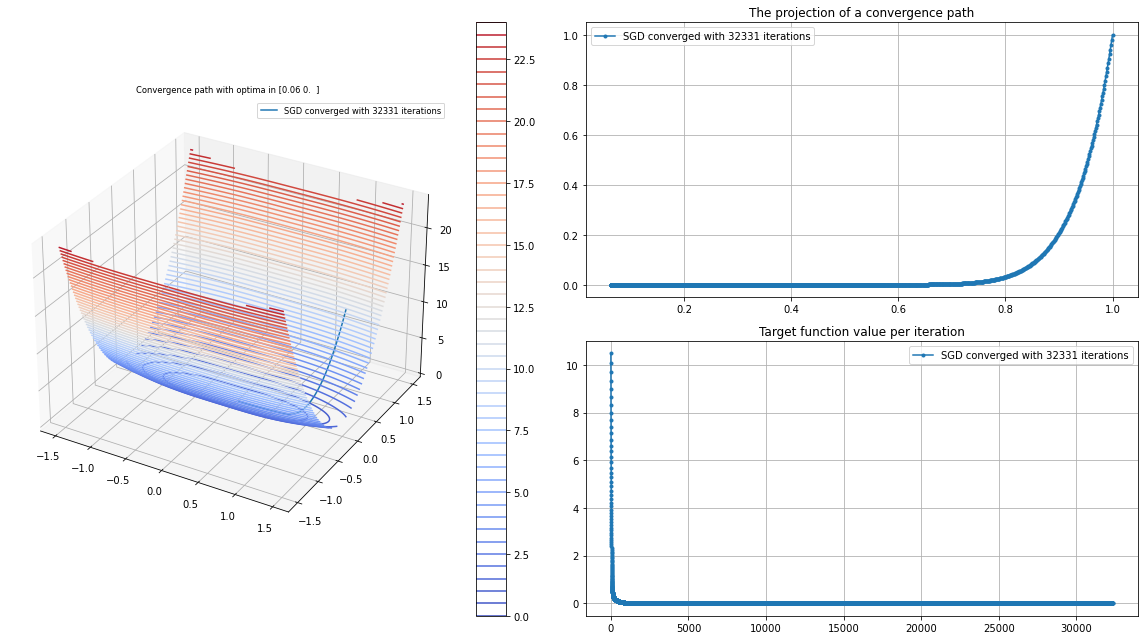

In [5]:
def plot_stats(F: Callable[[np.array], np.array], pathes: Tuple, borders: Tuple, label: str, grid_dens=0.01):
    x_opt, x_hist, y_hist, it = pathes
    xmin, xmax, ymin, ymax = borders
    X = np.meshgrid(np.arange(xmin, xmax, grid_dens), np.arange(ymin, ymax, grid_dens))

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(2, 2, (1, 3), projection='3d')

    fig.colorbar(ax.contour3D(X[0], X[1], F(X), 50, cmap=cm.coolwarm, antialiased=True))
    ax.plot(x_hist.T[0], x_hist.T[1], y_hist, label=label)
    ax.grid()

    ax.set_title(f"Convergence path with optima in {np.around(x_opt, 2)}", fontsize="small")
    ax.legend(fontsize="small")

    ax = fig.add_subplot(2, 2, 2)
    ax.plot(x_hist.T[0], x_hist.T[1], label=label, marker=".")
    ax.grid()
    
    ax.set_title("The projection of a convergence path")
    ax.legend()
    
    ax = fig.add_subplot(2, 2, 4)
    ax.plot(range(y_hist.shape[0]), y_hist, label=label, marker=".")
    ax.grid()
    
    ax.set_title("Target function value per iteration")
    ax.legend()
    
    fig.tight_layout()

    plt.show()


def SGD(F: Callable[[np.array], np.array], x: np.array,
        epoch: int, step=0.001, eps=0.001, h=0.0001) -> Tuple[np.array, np.array, int]:
    xi = np.copy(x)
    i = 0

    for _ in range(epoch):
        grad = grad_ext_center(F, x, h)
        x = x - step * grad
        xi = np.vstack((xi, x))

        if np.linalg.norm(grad) < eps: break
        else: i += 1

    return x, xi, i


#
F = lambda x: np.log(1 + x[0] ** 2) ** 2 + 10 * x[1] ** 2
x_opt, x_path, it = SGD(F, np.array([1.0, 1.0]), 100000)
y_path = F(x_path.T)

plot_stats(F, (x_opt, x_path, y_path, it), (-1.5, 1.5, -1.5, 1.5), f"SGD converged with {it} iterations")